In [1]:
library(tidyverse)
library(nycflights13)
library(hexbin)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 7.5.3.1 Exercises - Covariation 2 continous variables

## 1. Instead of summarizing the conditional distribution with a boxplot, you could use a frequency polygon. What do you need to consider when using cut_width() vs cut_number()? How does that impact visualisation of the 2d distribution of carat and price?

**cut_width(x, width)** makes groups of width 'width'. Meaning that you specify the width, and the number of bins is calculated automatically.

From the plot below, i specified the width of a bin to be 0.5, and from this, R automatically divided the bins into 7 categories, each covering 0.5 carat size ie -0.25 to 0.25, 0.25 to 0.75... and soon.

In [3]:
smaller <- diamonds %>% filter(carat < 3)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



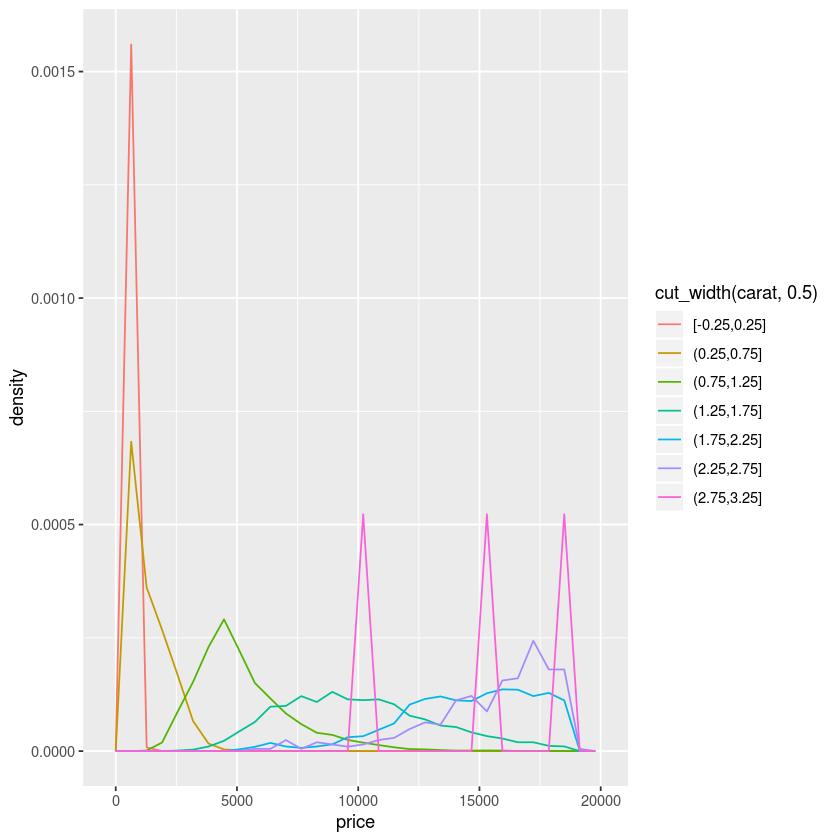

In [7]:
#cut_width
ggplot(data = smaller, mapping = aes(x = price, y = ..density..)) + 
geom_freqpoly(mapping = aes(color = cut_width(carat, 0.5)))

**cut_number(x, n)** makes n number of groups(bins) with (approximately) equal number of observations ie you specify  the number of bins and the width of each bin is automatically calculated by R. Here, the bins may not necessarily be the same width, but the observations per bin are equal.

From my plot below, i specified 5 number of bins and the plot was easy to understand. It shows that the lower carats were very highly distibuted at the lower prices, while the high carats were evenly distributed over the higher prices. The width of the bins was different though,with the width of bin 1, 2, 3, 4 and 5 being 0.15, 0.18. 0.37, 0.23 and 1.67 respectively. The number of points per bin are approximately equal. The 1st bin had the least width meaning a high concentration of observations were available over a small carat range, with the largest bin (5th bin) representing the highest carats, shows that the same number of points were distributed over a bigger carat range. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



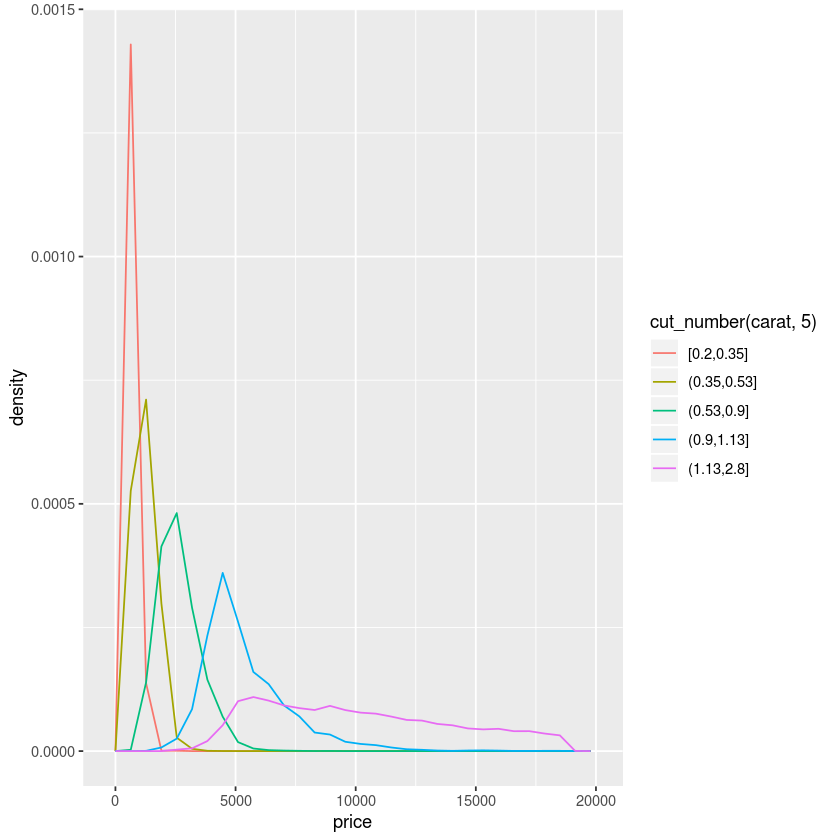

In [8]:
#cut_number
ggplot(data = smaller, mapping = aes(x = price, y = ..density..)) +
  geom_freqpoly(mapping = aes(color = cut_number(carat, 5)))

Answer: To consider when using 

**cut_width()** - What do i want the width of each bin to be, and about how many groups will this width result to, so that they are easy to read? A small cut_width may result in very many groups making making a mess of lines, while a very big cut_width will result in very few groups which will not enable us to make any conclusions.

**cut_number()** - How many number of groups(bins) do i want? And will these groups result in the data separated into ideal widths so that it is distributed well hence understandable? A high cut_number results into many groups hence many lines resulting into hard plot to understand. A small number of groups means higher width per group meaning alot of observations are grouped together and the groups are not necessarily representative.


## 2. Visualise the distribution of carat, partitioned by price.

Answer 1: Boxplots 

1st plot - Using boxplot and cut_width(price, 2500), results in creation of 8 separate boxplots. Varwidth means that the size width of a box represents the number of points. Hence, the 1st boxplot has few points, and represents low carat diamonds of low price. The 2nd and 3rd boxplot have the most points. The boxplots also show that the bigger carat diamonds command the higher prices and the relationship is linear. The topmost box shows that the highest priced diamonds are around 3 carats.

2nd plot - using boxplot and cut_number(price, 5). This separates the diamonds into 5 groups based on price, and the width of each is automatically calculated. The number of observations per group is however equal. Hence the 1st boxplot(smallest) shows that there are many points in the low carat low price category. The biggest boxplot, which is the last, shows that the same number of points are distributed over a much higher carat range and price range.

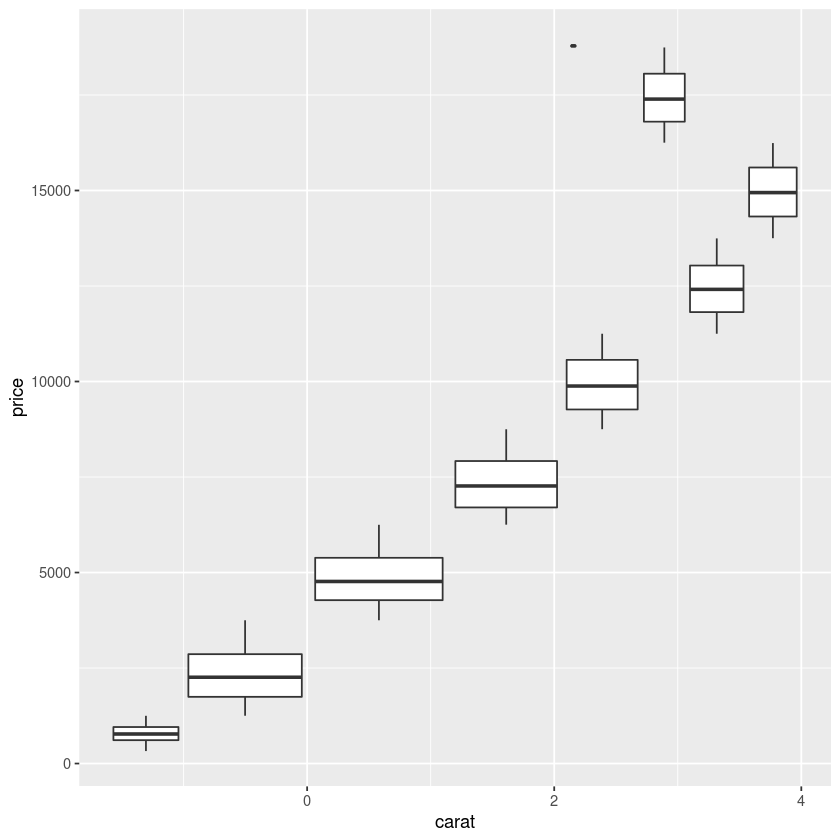

In [10]:
#boxplot
#cat_width and bin the price into groups of 2500. varwidth ensures the width of the box represents the number of observarions
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(price, 2500)), varwidth = TRUE)

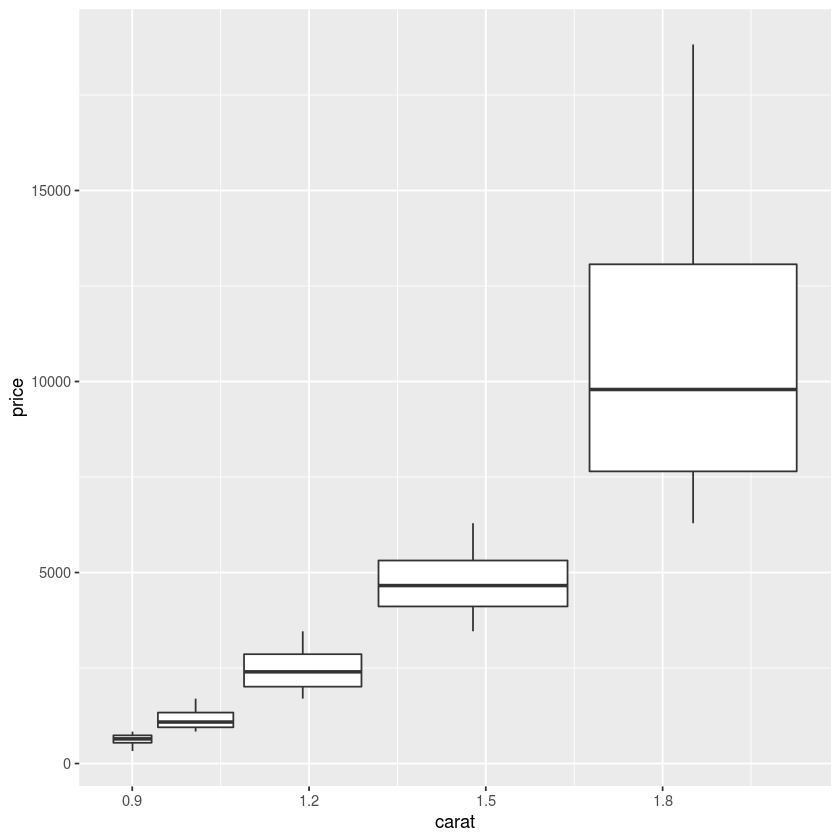

In [11]:
#boxplot
#cut_number - we specify we want 5 groups, and the width of each is calculated by R
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_number(price, 5)))

Answer 2: Frequency polygons

1st plot: cut_width(price, 5000) separates the data into bins of 5000 price difference, resulting into 5 groups. 

2nd plot: cut_number(price, 5) separates the data into 5 groups based on price, and determines the width of each bin/ group.

The freqpolygons show the distribution of price ranges on the carat sizes. The lowest prices are highly distributed in the low carats, while the highest price range is highly distributed in the high carat diamonds.

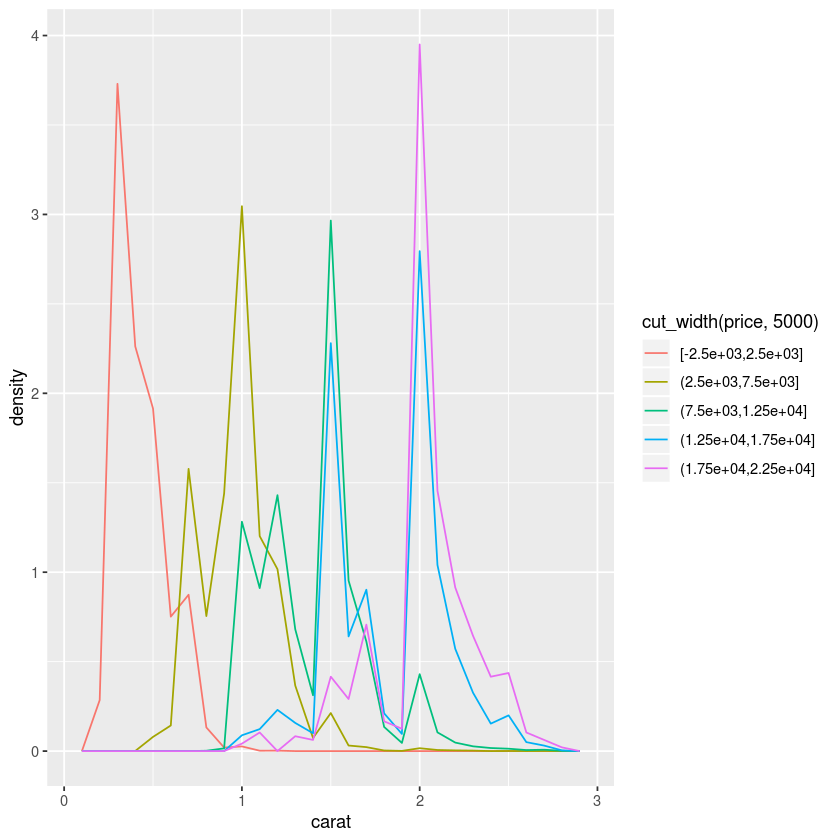

In [14]:
#geom_freqpoly and cut_width(price, 5000)
ggplot(data = smaller, mapping = aes(x = carat, y = ..density..)) + 
  geom_freqpoly(mapping = aes(color = cut_width(price, 5000)), binwidth = 0.1)

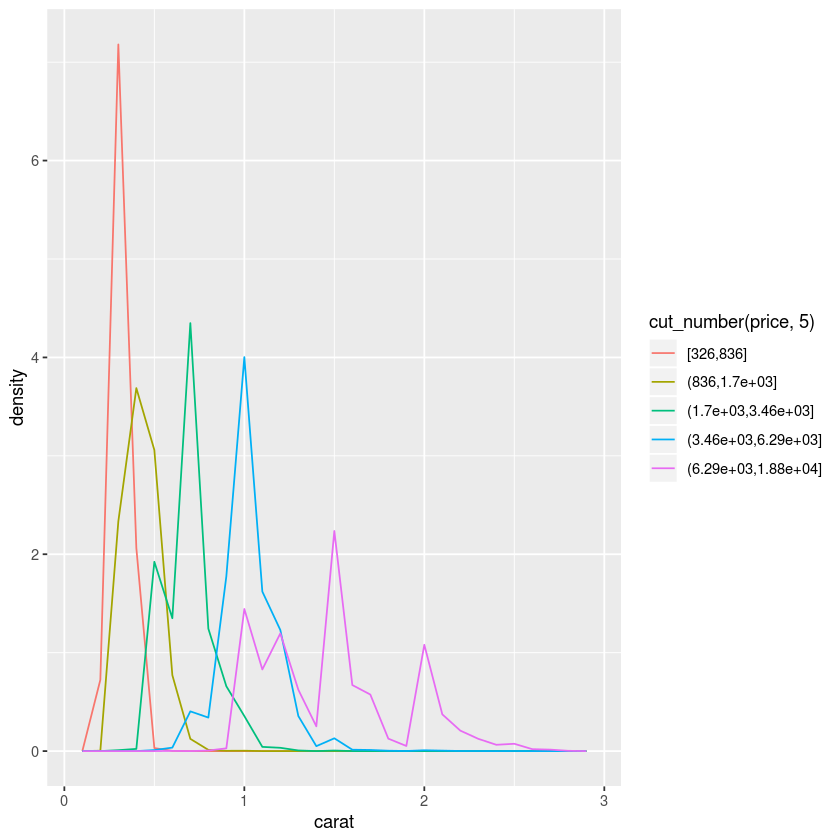

In [15]:
#geom_freqpoly and cut_number(price, 5)
ggplot(data = smaller, mapping = aes(x = carat, y = ..density..)) + 
  geom_freqpoly(mapping = aes(color = cut_number(price, 5)), binwidth = 0.1)

## 3. How does the price distribution of very large diamonds compare to small diamonds? Is it as you expect, or does it surprise you?

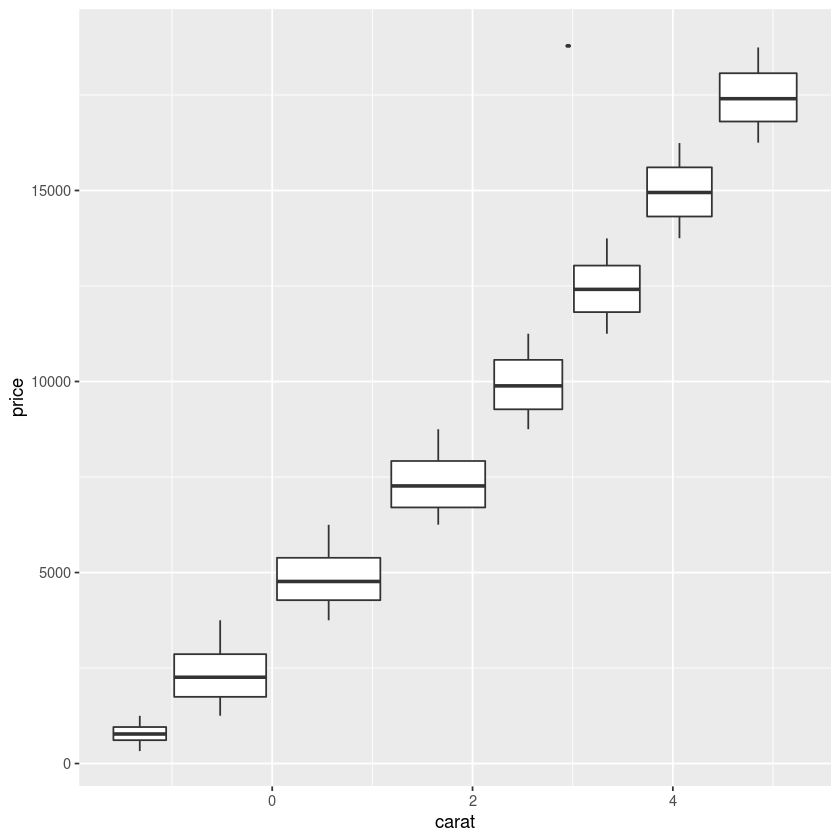

In [17]:
#boxplot
#cat_width and bin the price into groups of 2500. varwidth ensures the width of the box represents the number of observarions
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_width(price, 2500)), varwidth = TRUE)

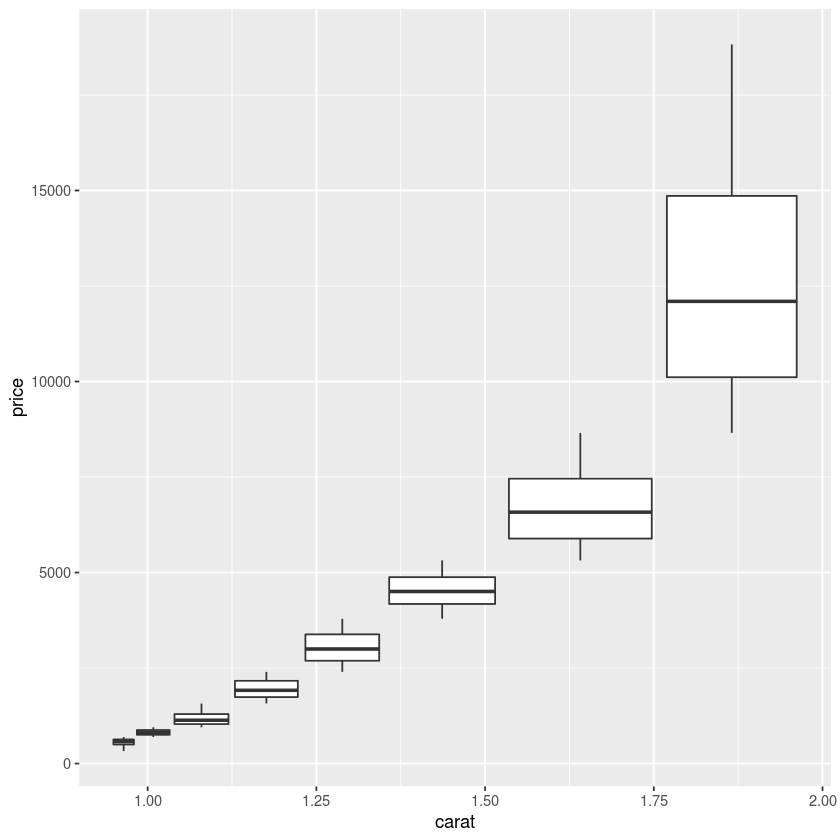

In [18]:
#boxplot
#cut_number - we specify we want 5 groups, and the width of each is calculated by R
ggplot(data = smaller, mapping = aes(x = carat, y = price)) + 
  geom_boxplot(mapping = aes(group = cut_number(price, 8)))

From the plots above, it shows that the large carat diamonds are distributed over a large price range, while the small diamonds are distributed over a very small price range.

This means that 2 of the big carat diamonds maybe close in carat sizes, but command significantly different prices, while 2 small diamonds with the same carat difference as the large ones, are priced very close together. 

The observation is interesting because it means large diamonds' prices differ very widely and 2 large diamonds could differ by thousands of dollars due to a small carat change.
Small diamonds' prices differ by just hundred of dollars.

## 4. Combine 2 of the techniques you've learned to visualise the combined distribution of cut, carat and price.

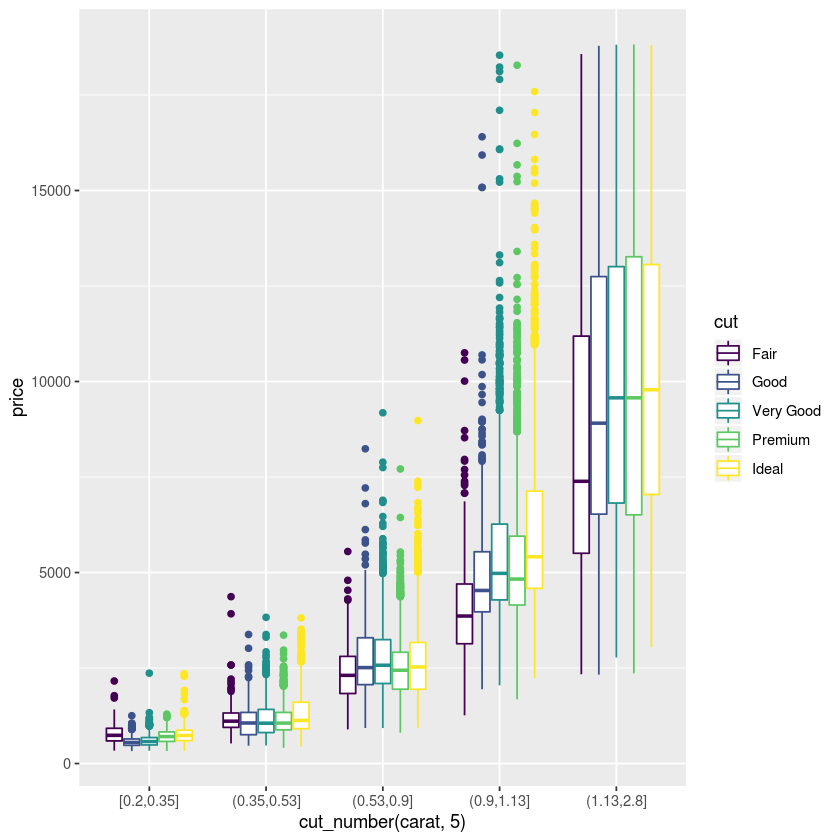

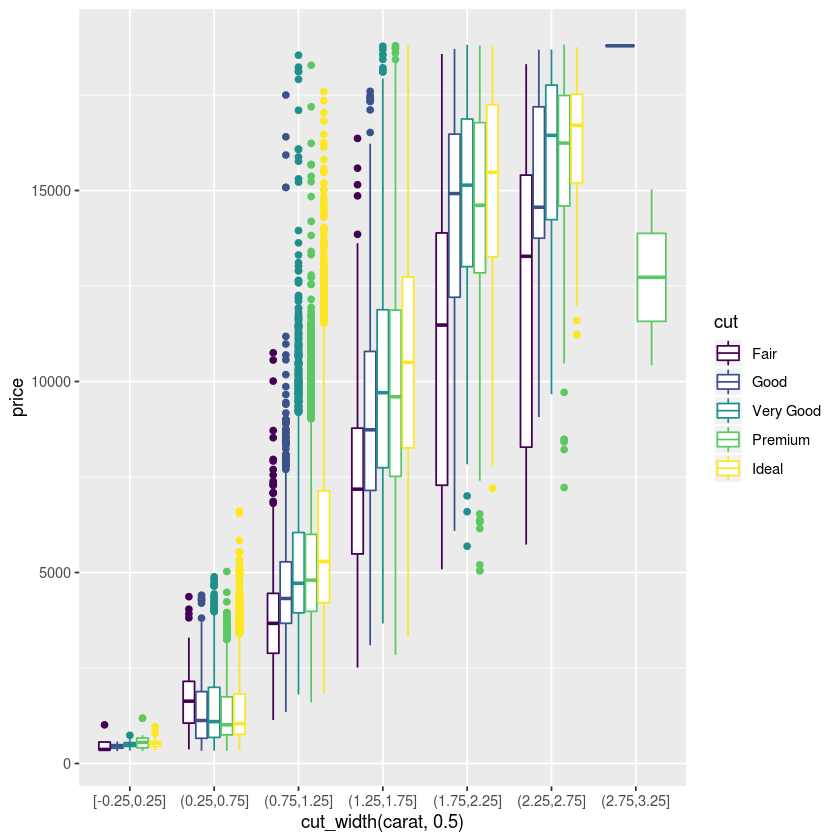

In [4]:
#boxplot
ggplot(data = smaller, mapping = aes(x = cut_number(carat, 5), y = price, color = cut)) + 
  geom_boxplot()

ggplot(data = smaller, mapping = aes(x = cut_width(carat, 0.5), y = price, color = cut)) + 
  geom_boxplot()

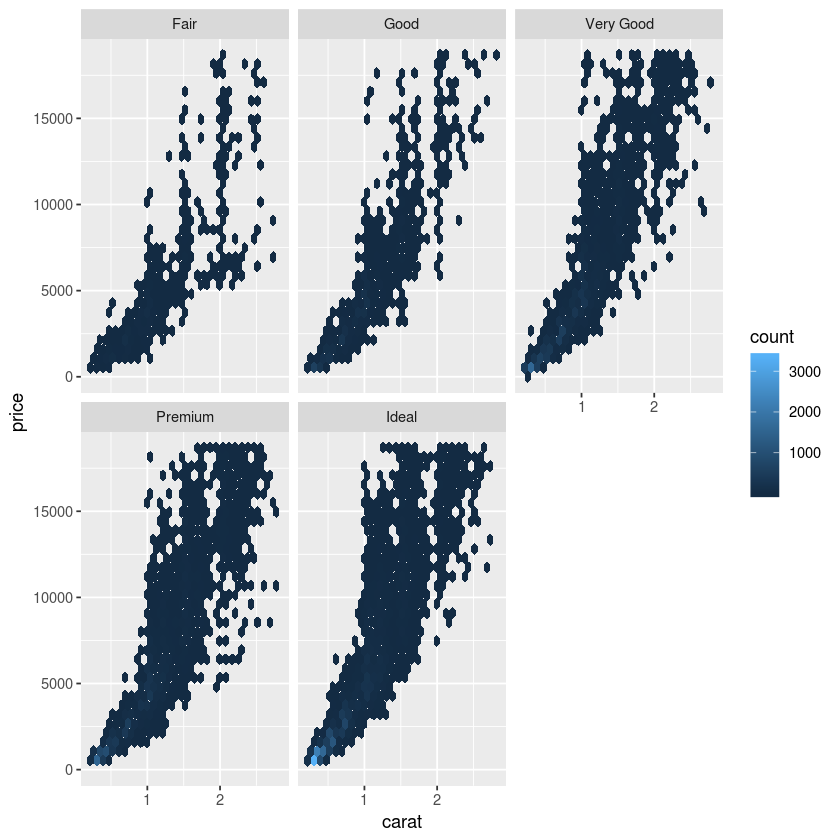

In [12]:
#hexbin
ggplot(data = smaller) + geom_hex(mapping = aes(x = carat, y = price)) +
  facet_wrap(~cut)

## 5. Two dimensional plots reveal outliers that are not visible in one dimensional plots. For example, some points in the plot below have an unusual combination of x and y values, which makes the points outliers even though their x and y values appear normal when examined separately.
## Why is a scatter plot a better display than a binned plot for this case?

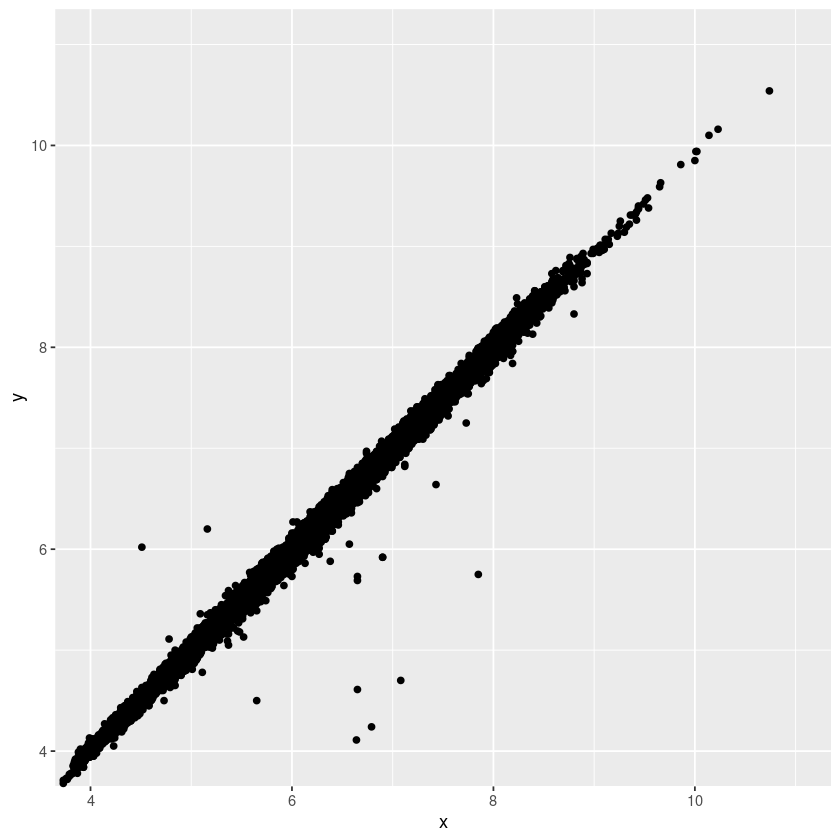

In [6]:
#scatter plot
ggplot(data = diamonds) + geom_point(mapping = aes(x = x, y = y)) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4,11))

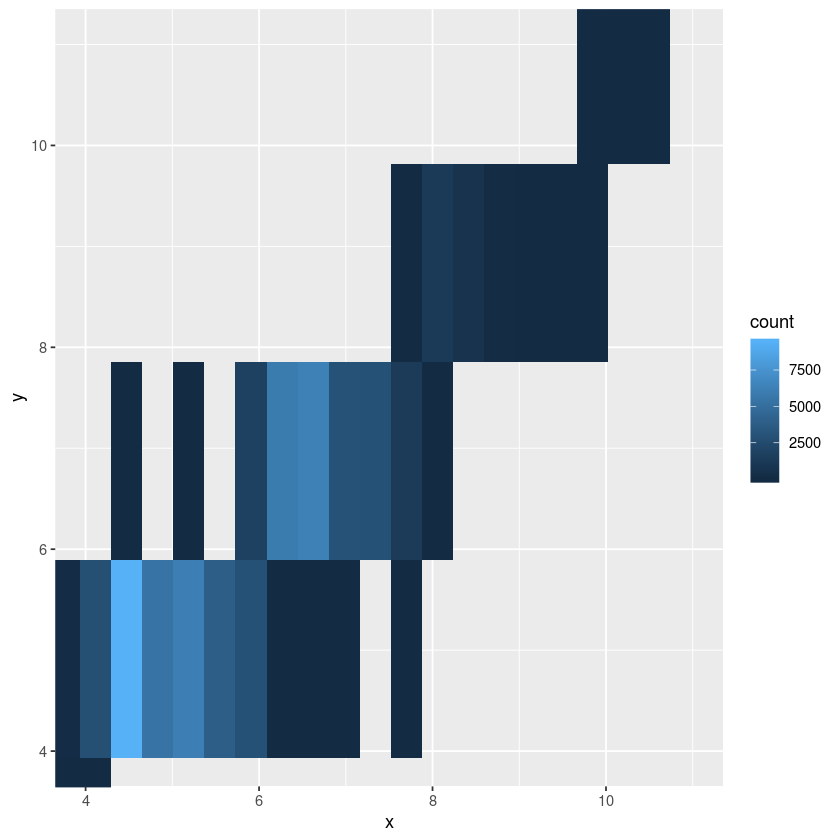

In [11]:
#2d bins
ggplot(data = diamonds) + geom_bin2d(mapping = aes(x = x, y = y)) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4,11))

#### Answer: The scatter plot plots individual plots, while the binned plots eg geom_bin2d above divides the plane into rectangles, counts the number of cases in each rectangle, and then (by default) maps the number of cases to the rectangle's fill. 
#### The result is that the outliers are bundled into 1 rectangle and it's not clear as is with the scatter plot.
#### A remedy to this would be to include 'bins = value' argument to the geom_bin2d, which specifies the number of bins to create. The higher the bins the less the points per bin, hence may result to a more clear picture which shows the outliers as in the scatterplot.

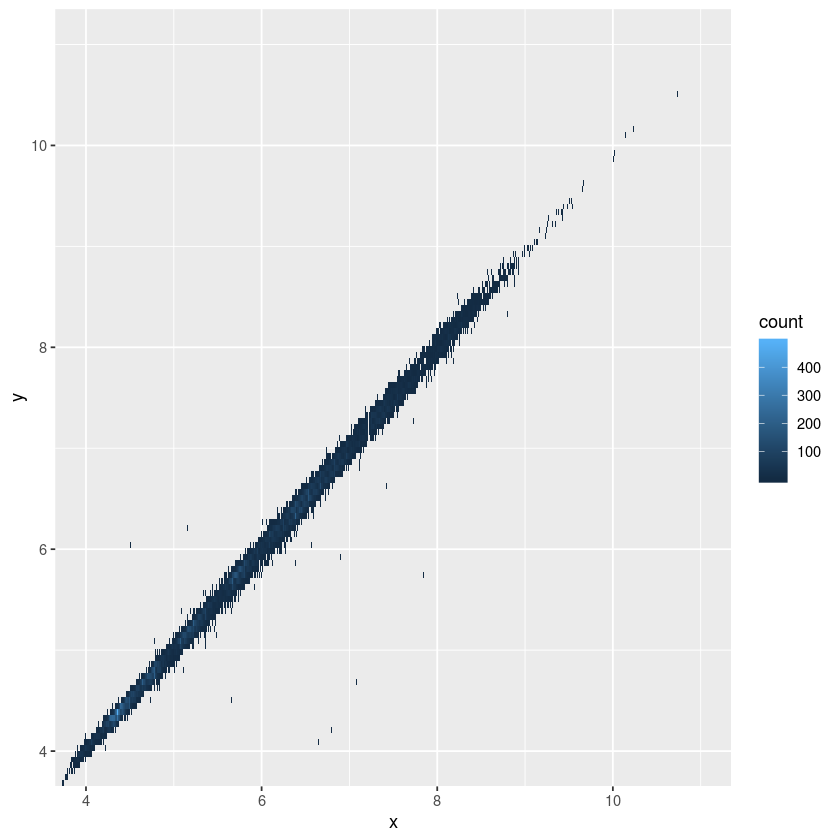

In [10]:
#2d bins
ggplot(data = diamonds) + geom_bin2d(mapping = aes(x = x, y = y), bins = 1000) +
  coord_cartesian(xlim = c(4, 11), ylim = c(4,11))